In [1]:
import geopandas as gpd

In [47]:
gdf = gpd.read_file('../land-eligibility/build/municipal/units.geojson')

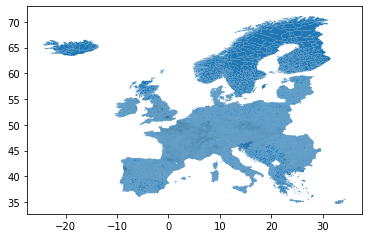

In [48]:
gdf.plot()

In [16]:
import shapely.geometry

In [26]:
config = {'scope':{
    
    'bounds': {
        'x_min': -30, # in degrees east
        'x_max': 37,  # in degrees east
        'y_min': 30,  # in degrees north
        'y_max': 75,  # in degrees north
    }, 'exclusion_zones':{
        'atlantic_islands':{
            'x_min': -30, # in degrees east
            'x_max': -10,  # in degrees east
            'y_min': 30,  # in degrees north
            'y_max': 41,  # in degrees north
    }}}
}
if config["scope"].get("exclusion_zones", {}) and isinstance(config["scope"]["exclusion_zones"], dict):
    holes = [
        (
            (exclusion_zone["x_max"], exclusion_zone["y_min"]),
            (exclusion_zone["x_max"], exclusion_zone["y_max"]),
            (exclusion_zone["x_min"], exclusion_zone["y_max"]),
            (exclusion_zone["x_min"], exclusion_zone["y_min"])
        )
        for exclusion_zone in config["scope"]["exclusion_zones"].values()
    ]
else:
    holes = []

study_area = shapely.geometry.Polygon(
    ((config["scope"]["bounds"]["x_min"], config["scope"]["bounds"]["y_min"]),
    (config["scope"]["bounds"]["x_min"], config["scope"]["bounds"]["y_max"]),
    (config["scope"]["bounds"]["x_max"], config["scope"]["bounds"]["y_max"]),
    (config["scope"]["bounds"]["x_max"], config["scope"]["bounds"]["y_min"])),
    holes=holes
)

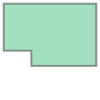

In [28]:
study_area.buffer(0)

In [149]:
study_area = _study_area(config)
completely_in = gdf.intersects(study_area)
for i in gdf[~completely_in].iterrows():
    print("Removing {} ({}) as they are outside of study area.".format(*i[1][["name", "LEVL_CODE"]]))
gdf = gdf[completely_in]

all_geoms = gdf.explode()
partially_in = all_geoms.within(study_area)
partially_out = ~partially_in.groupby(level=0).min()
for i in gdf.loc[partially_out].iterrows():
    print("Removing parts of {} ({}) as they are outside of study area.".format(*i[1][["name", "LEVL_CODE"]]))

new_geoms = all_geoms[partially_in.mul(partially_out, level=0)].reset_index().dissolve('level_0')
gdf.update(new_geoms.geometry.map(_to_multi_polygon).to_frame('geometry'))

Removing Canarias (nuts1) as they are outside of study area.
Removing Região Autónoma dos Açores (nuts1) as they are outside of study area.
Removing Região Autónoma da Madeira (nuts1) as they are outside of study area.
Removing Canarias (nuts2) as they are outside of study area.
Removing Guadeloupe (nuts2) as they are outside of study area.
Removing Martinique (nuts2) as they are outside of study area.
Removing Guyane (nuts2) as they are outside of study area.
Removing Réunion (nuts2) as they are outside of study area.
Removing Região Autónoma dos Açores (nuts2) as they are outside of study area.
Removing Região Autónoma da Madeira (nuts2) as they are outside of study area.
Removing El Hierro (nuts3) as they are outside of study area.
Removing Fuerteventura (nuts3) as they are outside of study area.
Removing Gran Canaria (nuts3) as they are outside of study area.
Removing La Gomera (nuts3) as they are outside of study area.
Removing La Palma (nuts3) as they are outside of study area.
R

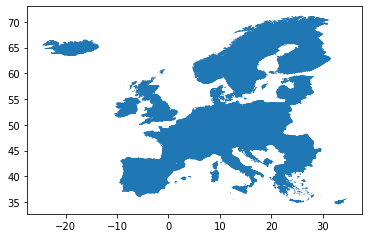

In [151]:
gdf.plot()

In [34]:
foo = gpd.read_file('../land-eligibility/build/administrative-borders-nuts.old.gpkg', layer='nuts3')

In [153]:
bar = gpd.read_file('../test/nuts.gpkg', layer='nuts3')

In [154]:
bar.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [167]:
fiona.listlayers('../test/gadm36_GBR.gpkg')

['gadm36_GBR_0', 'gadm36_GBR_1', 'gadm36_GBR_2', 'gadm36_GBR_3']

In [134]:
config['scope']

{'countries': ['Austria',
  'Belgium',
  'Bulgaria',
  'Croatia',
  'Cyprus',
  'Czech Republic',
  'Denmark',
  'Estonia',
  'Finland',
  'France',
  'Germany',
  'Greece',
  'Hungary',
  'Ireland',
  'Italy',
  'Latvia',
  'Lithuania',
  'Luxembourg',
  'Netherlands',
  'Poland',
  'Portugal',
  'Romania',
  'Slovakia',
  'Slovenia',
  'Spain',
  'Sweden',
  'United Kingdom',
  'Albania',
  'Bosnia and Herzegovina',
  'North Macedonia',
  'Montenegro',
  'Norway',
  'Serbia',
  'Switzerland',
  'Iceland'],
 'bounds': {'x_min': -30, 'x_max': 37, 'y_min': 30, 'y_max': 75},
 'exclusion_zones': {'atlantic_islands': {'x_min': -29.5,
   'x_max': -10,
   'y_min': 31,
   'y_max': 41}}}

In [189]:
foo = gpd.read_file('../test/foobar.gpkg')

In [197]:
foo["level"] = foo.source_ds_lyr.str.rsplit('_', 1, expand=True)[1]

In [208]:
for i in foo.level.unique():
    foo.loc[foo.level == i, "country_code"] = foo.loc[foo.level == i, "GID_0"]
    foo.loc[foo.level == i, "id"] = foo.loc[foo.level == i, f"GID_{i}"]
    foo.loc[foo.level == i, "name"] = foo.loc[foo.level == i, f"NAME_{i}"]
    if int(i) > 0:
        foo.loc[foo.level == i, "type"] = foo.loc[foo.level == i, f"ENGTYPE_{i}"]
    else:
        foo.loc[foo.level == i, "type"] = "country"
foo["proper"] = True

In [185]:
bar = gpd.read_file('../land-eligibility/build/administrative-borders-gadm.gpkg', level=1)

In [215]:
foo.level.apply(lambda x: f"foo{x}")

0       foo0
1       foo1
2       foo1
3       foo1
4       foo1
5       foo1
6       foo1
7       foo1
8       foo1
9       foo1
10      foo1
11      foo1
12      foo1
13      foo2
14      foo2
15      foo2
16      foo2
17      foo2
18      foo2
19      foo2
20      foo2
21      foo2
22      foo2
23      foo2
24      foo2
25      foo2
26      foo2
27      foo2
28      foo2
29      foo2
        ... 
992     foo3
993     foo3
994     foo3
995     foo3
996     foo3
997     foo3
998     foo3
999     foo3
1000    foo3
1001    foo3
1002    foo3
1003    foo3
1004    foo3
1005    foo3
1006    foo3
1007    foo3
1008    foo3
1009    foo3
1010    foo3
1011    foo3
1012    foo3
1013    foo3
1014    foo3
1015    foo3
1016    foo3
1017    foo3
1018    foo3
1019    foo3
1020    foo3
1021    foo3
Name: level, Length: 1022, dtype: object

In [202]:
class AdminBorders(gpd.GeoDataFrame):
    def __init__(self, gdf):
        super().__init__(gdf)
        self.foo = 'a'

In [203]:
bar = AdminBorders(foo)

In [205]:
bar.foo

'a'

In [210]:
foo[list(SCHEMA["properties"].keys())]

,country_code,id,name,type,proper
0,ALB,ALB,Albania,country,True
1,ALB,ALB.1_1,Berat,County,True
2,ALB,ALB.2_1,Dibër,County,True
3,ALB,ALB.3_1,Durrës,County,True
4,ALB,ALB.4_1,Elbasan,County,True
5,ALB,ALB.5_1,Fier,County,True
6,ALB,ALB.6_1,Gjirokastër,County,True
7,ALB,ALB.7_1,Korçë,County,True
8,ALB,ALB.8_1,Kukës,County,True
9,ALB,ALB.9_1,Lezhë,County,True
